### Setup

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None, 'display.max_rows', 100) 

from os import path
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno
import pandas_profiling

import re
import datetime
import dateutil

from sklearn.model_selection import train_test_split

C:\Users\David\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Import

In [2]:
# Open pickle file with raw data

f = 'loan.p'
d = '../data/raw'
fp = path.join(d,f)

with open(fp, 'rb') as file:
    data = pickle.load(file)

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null datetime64[ns]
loan_status  

In [5]:
data.shape

(887379, 74)

In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [7]:
data.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint
count,887379,887379,887379,835922,887379,887379,887379,887379,887379,887379,126029,887379,887228,887379,887379,887379,887379,511
unique,2,7,35,299272,12,6,3,10,2,887379,124470,14,63145,935,51,2,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,601779,887369,1,246,524215,414001,9770,129517,456848,886868,283


In [8]:
data.describe(include=['datetime'])

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,887379,887350,869720,634408,887326
unique,103,697,98,100,103
top,2015-10-01 00:00:00,2001-08-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
freq,48631,6659,470150,553406,730574
first,2007-06-01 00:00:00,1944-01-01 00:00:00,2007-12-01 00:00:00,2007-12-01 00:00:00,2007-05-01 00:00:00
last,2015-12-01 00:00:00,2012-11-01 00:00:00,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00


### Attribute Info

##### Borrower Info
- addr_state: The state provided by the borrower in the loan application (categorical: 2 char state code)
- annual_inc: The self-reported annual income provided by the borrower during registration (numeric)
- annual_inc_joint: The combined self-reported annual income provided by the co-borrowers during registration (numeric)
- emp_length: Employment length in years (categorical: '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years' , '9 years', '10+ years')
- emp_title: The job title supplied by the Borrower when applying for the loan (text)
- home_ownership: The home ownership status provided by the borrower during registration. (categorical: 'RENT', 'OWN', 'MORTGAGE', 'OTHER')
- verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified (categorical: 'Verified', 'Source Verified', 'Not Verified')
- member_id: A unique LC assigned Id for the borrower member (numeric)
- verification_status_joint: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified (categorical: 'NaN', 'Verified', 'Source Verified', 'Not Verified')
- zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application (categorical: '\[0-9\]\{3\}xx')

##### Loan Info
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers (categorical: 'INDIVIDUAL', 'JOINT')
- collection_recovery_fee: Post charge off collection fee (numeric)
- desc: Loan description provided by the borrower (text)
- grade: LC assigned loan grade (categorical: 'A',' B', 'C', 'D', 'E', 'F', 'G']
- id: A unique LC assigned ID for the loan listing (numeric)
- initial_list_status: The initial listing status of the loan (categorical: 'W', 'F')
- issue_d: The month which the loan was funded (date: Mon-Year)
- last_credit_pull_d: The most recent month LC pulled credit for this loan (date: Mon-Year)
- loan_status: Current status of the loan (categorical: 'Fully Paid', 'Charged Off', 'Current', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Issued')
- policy_code: publicly available policy_code=1; new products not publicly available policy_code=2 (categorical: '1', '2')
- purpose: A category provided by the borrower for the loan request (categorical: 'credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational')
- sub_grade: LC assigned loan subgrade (categorical: '\[A-G\]\[1-5\]')
- title: The loan title provided by the borrower (text)
- url: URL for the LC page with listing data

##### Loan Finances
- funded_amnt: The total amount committed to that loan at that point in time (numeric)
- funded_amnt_inv: The total amount committed by investors for that loan at that point in time. (numeric)
- installment: The monthly payment owed by the borrower if the loan originates (numeric)
- int_rate:	Interest Rate on the loan (numeric)
- last_pymnt_amnt: Last total payment amount received (numeric)
- last_pymnt_d:	Last month payment was received (date: Mon-Year)
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value (numeric)
- next_pymnt_d:	Next scheduled payment date (date: Mon-Year)
- out_prncp: Remaining outstanding principal for total amount funded (numeric)
- out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors (numeric)
- pymnt_plan: Indicates if a payment plan has been put in place for the loan (categorical: 'y', 'n')
- recoveries: post charge-off gross recovery (numeric)
- term: The number of payments on the loan. Values are in months and can be either 36 or 60 (categorical: '36', '60')
- total_pymnt: Payments received to date for total amount funded (numeric)
- total_pymnt_inv: Payments received to date for portion of total amount funded by investors (numeric)
- total_rec_int: Interest received to date (numeric)
- total_rec_late_fee: Late fees received to date (numeric)
- total_rec_prncp: Principal received to date (numeric)

##### Borrower Credit History
- collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections (numeric)
- delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years (numeric)
- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage  and the requested LC loan, divided by the borrower’s self-reported monthly income. (numeric)
- dti_joint: A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income (numeric)
- earliest_cr_line:	The month the borrower's earliest reported credit line was opened (date: Mon-Year)
- fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- fico_range_low: The lower boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries) (numeric)
- last_fico_range_high	The upper boundary range the borrower’s last FICO pulled belongs to (MISSING)
- last_fico_range_low	The lower boundary range the borrower’s last FICO pulled belongs to (MISSING)
- mths_since_last_delinq: The number of months since the borrower's last delinquency (numeric)
- mths_since_last_major_derog: Months since most recent 90-day or worse rating (numeric)
- mths_since_last_record: The number of months since the last public record (numeric)
- open_acc:	The number of open credit lines in the borrower's credit file. (numeric)
- pub_rec: Number of derogatory public records (numeric)
- revol_bal: Total credit revolving balance (numeric)
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit (numeric)
- total_acc: The total number of credit lines currently in the borrower's credit file (numeric)
- open_acc_6m: Number of open trades in last 6 months (numeric)
- open_il_6m: Number of currently active installment trades (numeric)
- open_il_12m: Number of installment accounts opened in past 12 months (numeric)
- open_il_24m: Number of installment accounts opened in past 24 months (numeric)
- mths_since_rcnt_il: Months since most recent installment accounts opened (numeric)
- total_bal_il:	Total current balance of all installment accounts (numeric)
- il_util: Ratio of total current balance to high credit/credit limit on all install acct (numeric)
- open_rv_12m: Number of revolving trades opened in past 12 months (numeric)
- open_rv_24m: Number of revolving trades opened in past 24 months (numeric)
- max_bal_bc: Maximum current balance owed on all revolving accounts (numeric)
- all_util: Balance to credit limit on all trades (numeric)
- total_rev_hi_lim:	Total revolving high credit/credit limit (numeric)
- inq_fi: Number of personal finance inquiries (numeric)
- total_cu_tl: Number of finance trades (numeric)
- inq_last_12m:	Number of credit inquiries in past 12 months (numeric)
- acc_now_delinq: The number of accounts on which the borrower is now delinquent (numeric)
- tot_coll_amt: Total collection amounts ever owed (numeric)
- tot_cur_bal: Total current balance of all accounts (numeric)

In [9]:
num_cols = ['annual_inc', 'annual_inc_joint', 'loan_amnt', 'collection_recovery_fee', 'funded_amnt', 'funded_amnt_inv',
            'installment', 'int_rate', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_pymnt', 'total_pymnt_inv',
            'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti',
            'dti_joint', 'inq_last_6mths', 'inq_last_12m', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record',
            'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
            'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
            'inq_fi', 'total_cu_tl', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']

cat_cols = ['emp_length', 'home_ownership', 'verification_status', 'verification_status_joint', 'zip_code',
            'application_type', 'grade', 'initial_list_status', 'loan_status', 'policy_code', 'purpose','sub_grade',
            'pymnt_plan', 'term', ]

date_cols = ['issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line']

id_cols = ['id', 'member_id']

text_cols = ['url', 'emp_title', 'desc', 'title']

### Data Cleaning

##### Null Data (All)

An overview of all data, to start:

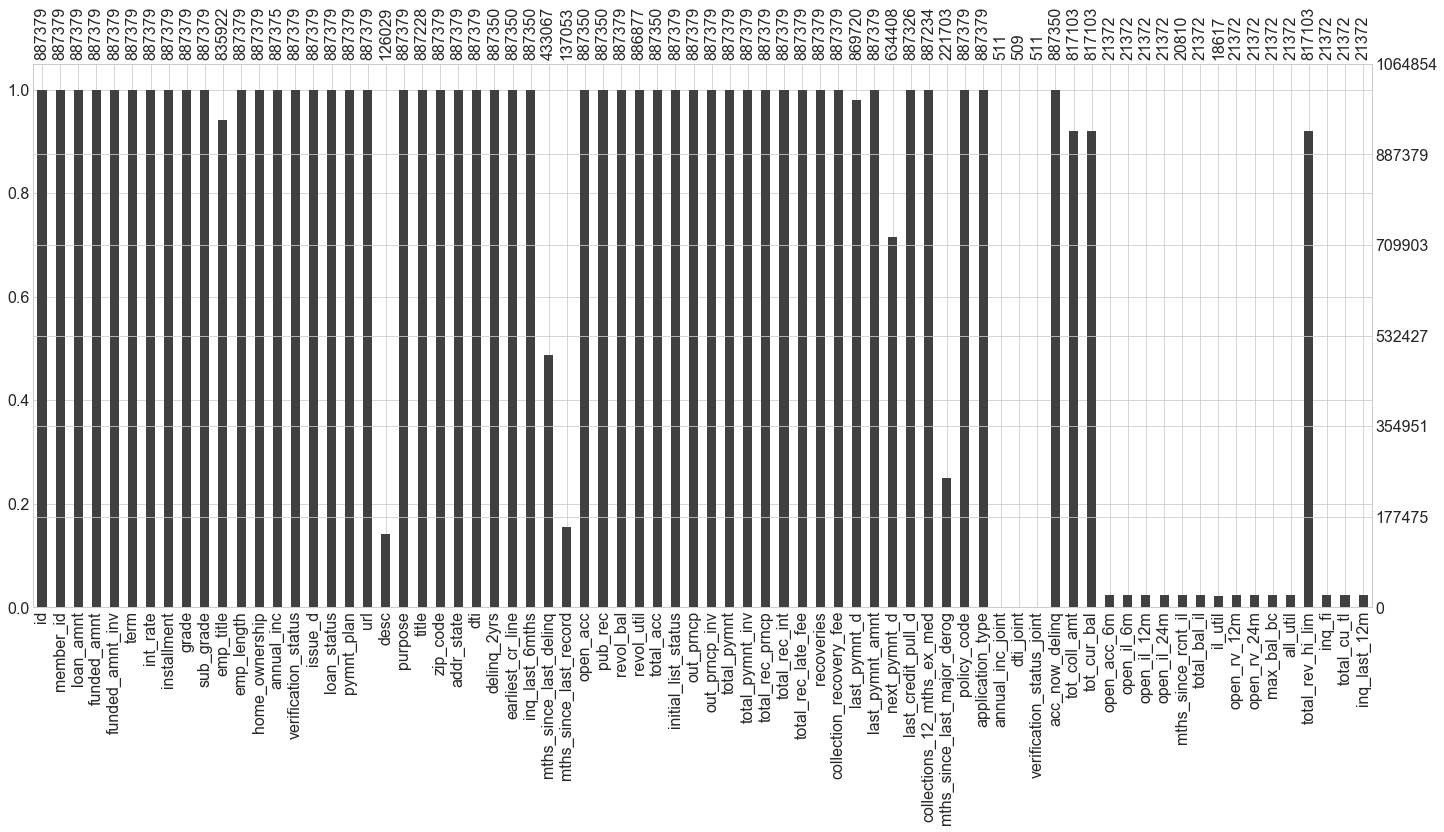

In [10]:
msno_bar_all = msno.bar(data, labels=True, inline=False)

for label in msno_bar_all.axes[0].get_xmajorticklabels() + msno_bar_all.axes[2].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')
    
plt.show()

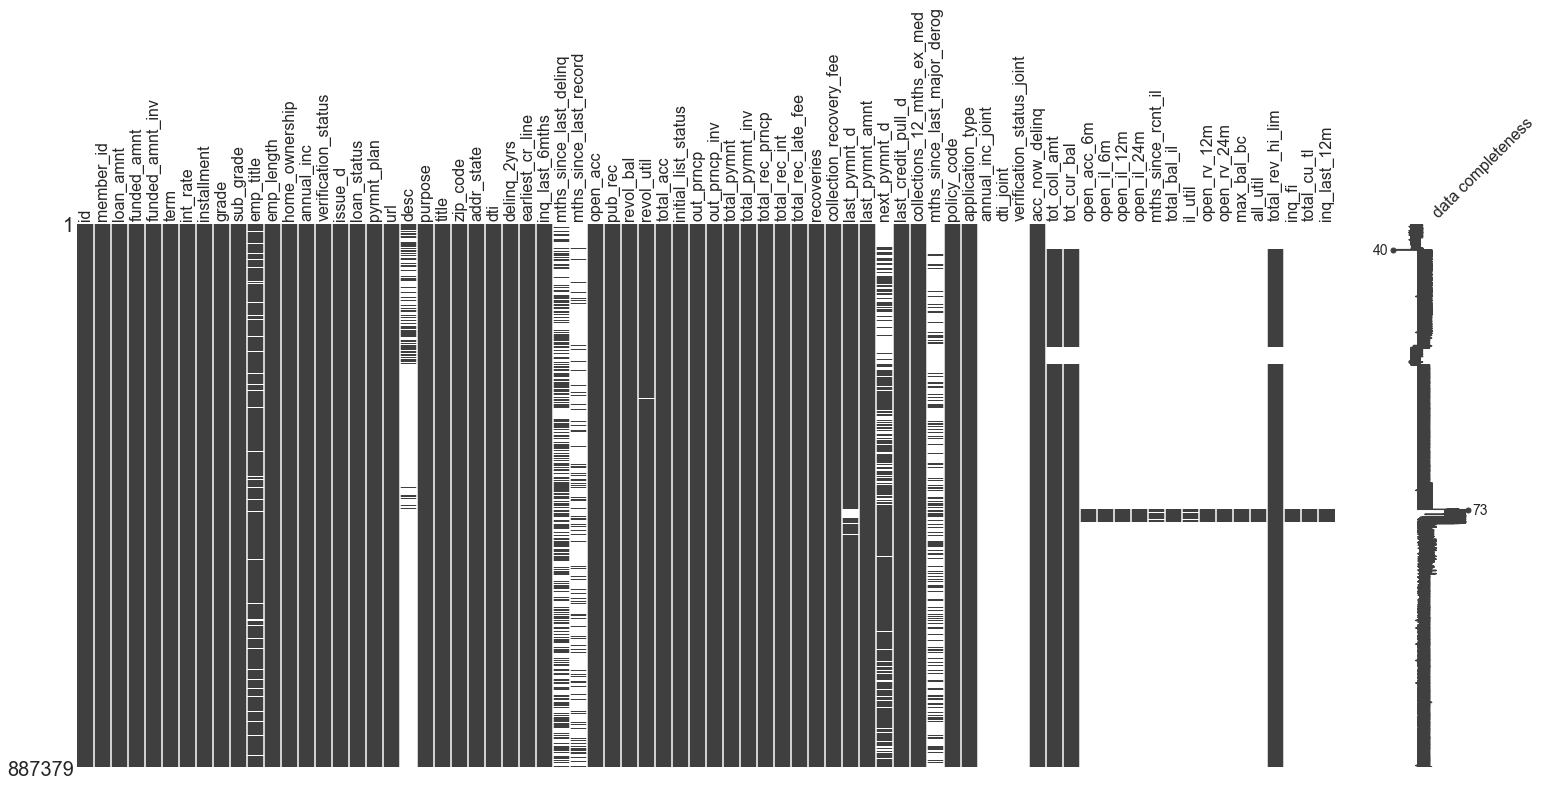

In [11]:
msno_mat_all = msno.matrix(data, labels=True, inline=False)

for label in msno_mat_all.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')

plt.show()

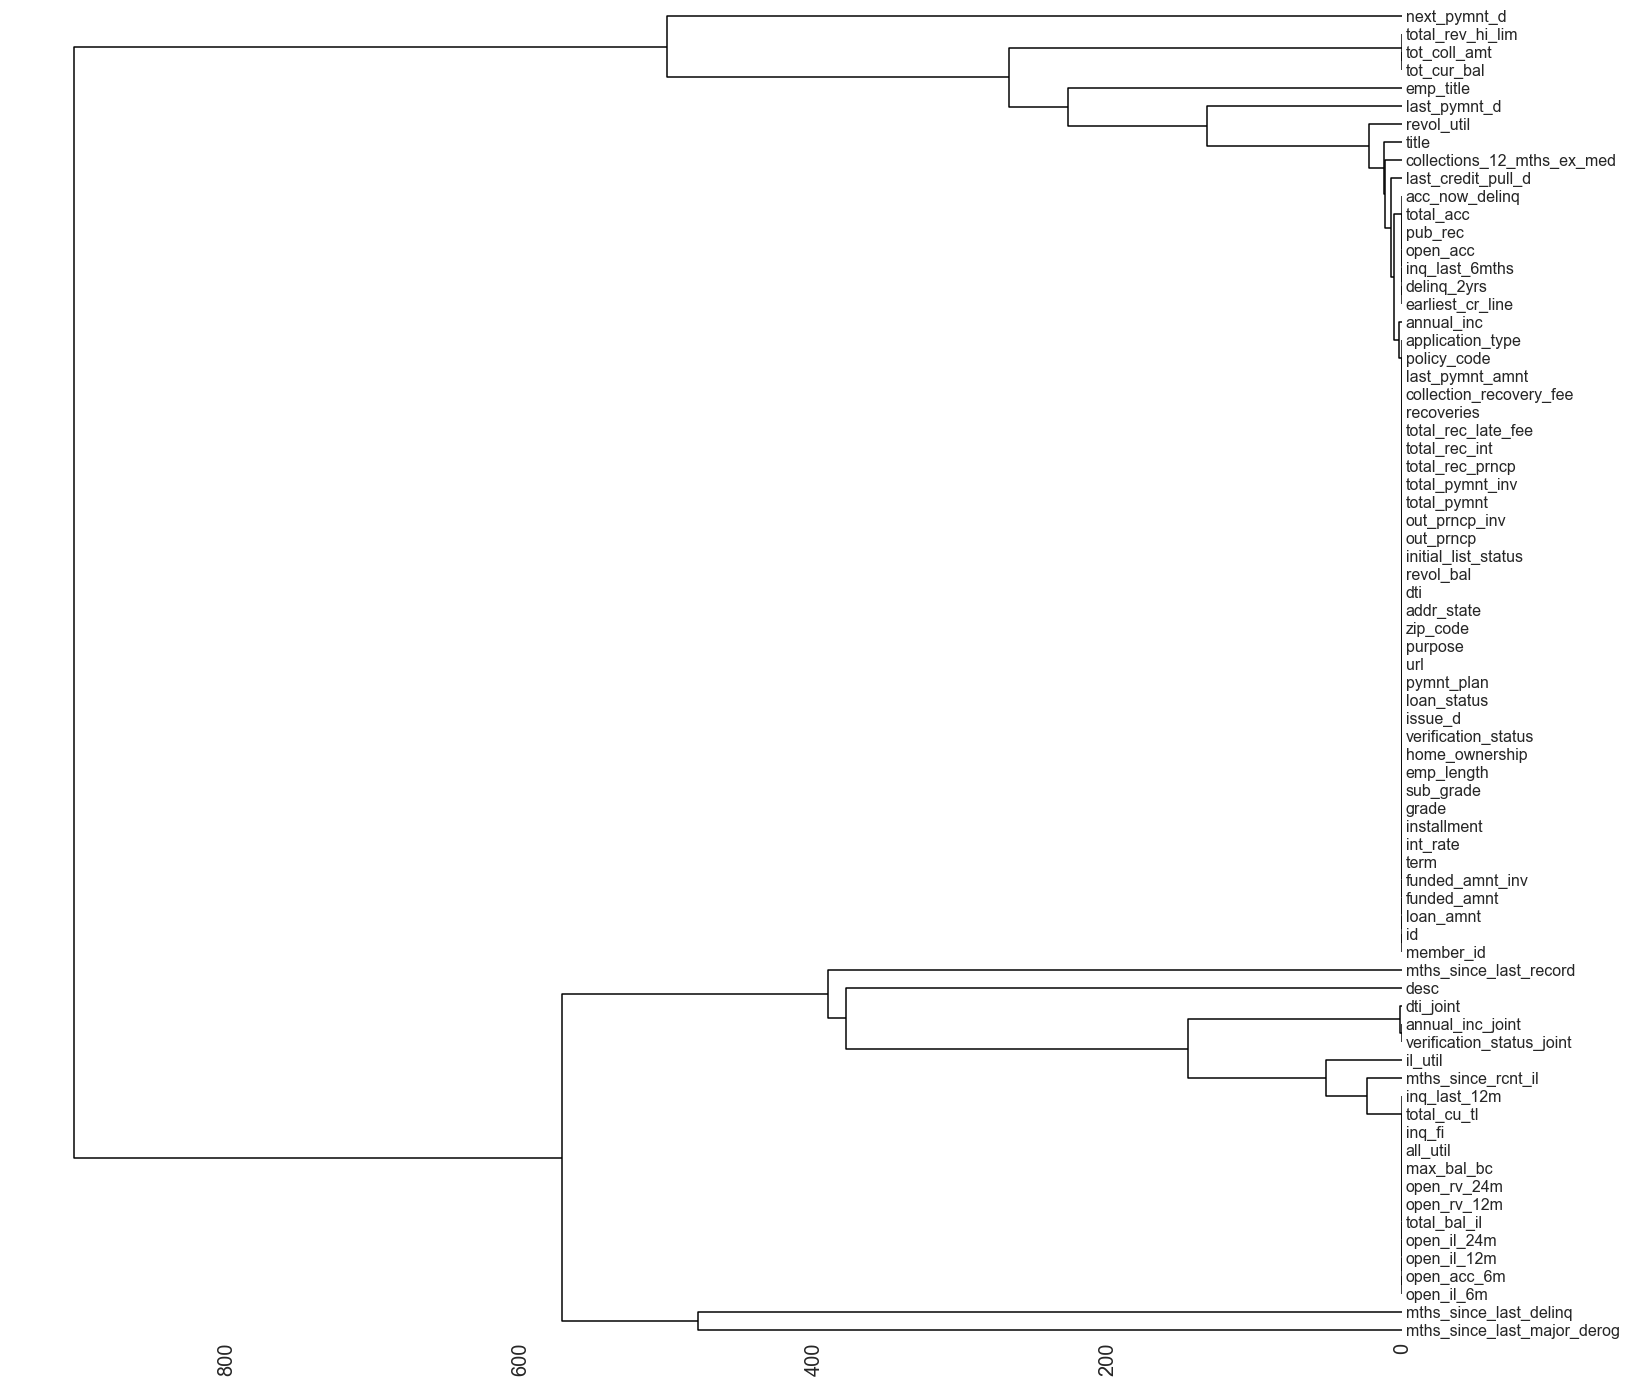

In [12]:
msno_dendro_all = msno.dendrogram(data, inline=False)
for label in msno_dendro_all.axes[0].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')

plt.show()

There are already some clear features will signficiant amounts of missing data. Since this is a lot to process at once, we will split the handling of null values into numerical, categorical, and other.

##### Null Numerical Data

In [13]:
null_num_sum = data[num_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_num_sum, 'null':null_num_sum, '% null': null_num_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
annual_inc,887375,4,0.000005
annual_inc_joint,511,886868,0.999424
loan_amnt,887379,0,0.000000
collection_recovery_fee,887379,0,0.000000
funded_amnt,887379,0,0.000000
funded_amnt_inv,887379,0,0.000000
installment,887379,0,0.000000
int_rate,887379,0,0.000000
last_pymnt_amnt,887379,0,0.000000
out_prncp,887379,0,0.000000


Seems to be a recurring 29 missing values with the features 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'total_acc', and 'acc_now_delinq'. Will see if dropping these fixes all instances:

In [14]:
data.dropna(subset=['open_acc'])[num_cols].isnull().sum()

annual_inc                          0
annual_inc_joint               886839
loan_amnt                           0
collection_recovery_fee             0
funded_amnt                         0
funded_amnt_inv                     0
installment                         0
int_rate                            0
last_pymnt_amnt                     0
out_prncp                           0
out_prncp_inv                       0
recoveries                          0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_int                       0
total_rec_late_fee                  0
total_rec_prncp                     0
collections_12_mths_ex_med        116
delinq_2yrs                         0
dti                                 0
dti_joint                      886841
inq_last_6mths                      0
inq_last_12m                   865978
mths_since_last_delinq         454283
mths_since_last_major_derog    665647
mths_since_last_record         750297
open_acc    

Appears to have eliminated all of the 29 NaN records, as well as the 4 missing annual income.

In [15]:
# Drop records missing open_acc (and those tied to it)
data.dropna(subset=['open_acc'], inplace=True)

Repeating the missigno visualizations for a more 'concise' represenation of numerical features alone:

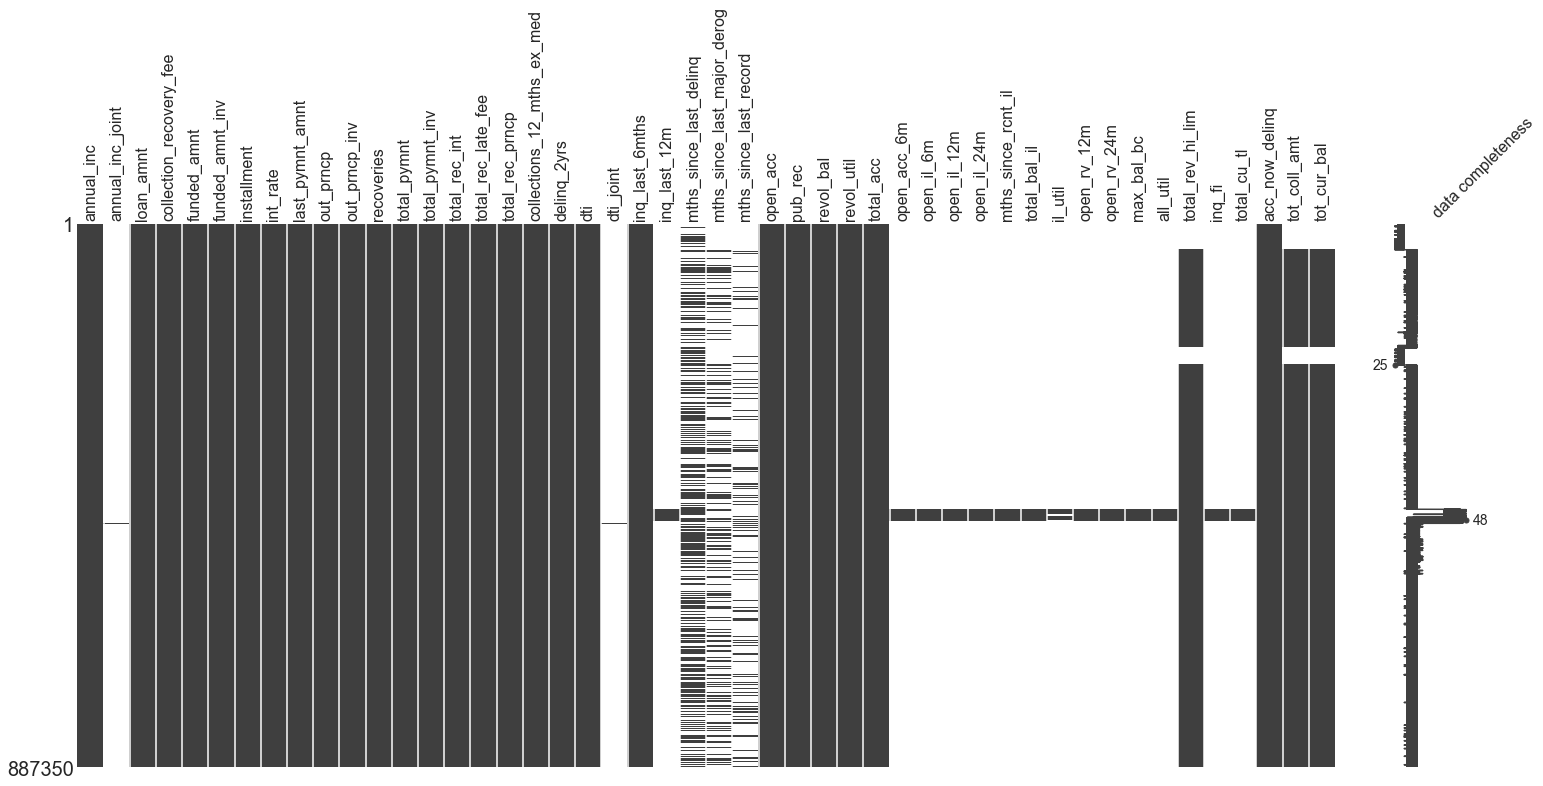

In [16]:
msno_mat_num = msno.matrix(data[num_cols], labels=True, inline=False)
for label in msno_mat_num.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')
plt.show()

There is a clear gap in data for the set of 'x months ago' columns. As established during EDA, these missing time values are tied to year the loan was issued:

In [17]:
# Number missing
data['open_acc_6m'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

issue_d
2007       574.0
2008      2393.0
2009      5281.0
2010     12537.0
2011     21721.0
2012     53367.0
2013    134755.0
2014    235628.0
2015    399722.0
Name: open_acc_6m, dtype: float64

In [18]:
# % Missing
data['open_acc_6m'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum() /data['open_acc_6m'].groupby(data['issue_d'].map(lambda x: x.year)).size()

issue_d
2007    1.000000
2008    1.000000
2009    1.000000
2010    1.000000
2011    1.000000
2012    1.000000
2013    1.000000
2014    1.000000
2015    0.949246
Name: open_acc_6m, dtype: float64

Only some records in 2015 actually having values. We will take a closer look at 2015 to see if a particular part of the year has data:

In [19]:
mask_2015 = data['issue_d'].map(lambda x: x.year) == 2015

data[mask_2015]['open_acc_6m'].groupby(data['issue_d'].map(lambda x: x.month)).size() -\
    data[mask_2015]['open_acc_6m'].isnull().groupby(data['issue_d'].map(lambda x: x.month)).sum()

issue_d
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12    21372.0
Name: open_acc_6m, dtype: float64

Only the loans issued in December 2015 have this data populated. Due to the time sensitivity of this data, there is little that can be done in ways of imputing, so our best option is to simply drop these columns.

In [20]:
num_cols_remove = ['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                   'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [21]:
data.drop(num_cols_remove, axis=1, inplace=True)

'mnths_since_last_delinq', 'mths_since_last_major_derog', and 'mths_since_last_record' are also quite sparse, which is very likely a result of records which have no delinquency etc. on record.

In [22]:
# Percentage of NaN 'mths_since_last_delinq' explained by 0 delinquencies in past 2 years
((np.isnan(data['mths_since_last_delinq'])) & (data['delinq_2yrs'] == 0)).sum() / (np.isnan(data['mths_since_last_delinq'])).sum()

0.99537072705780316

99.5% of records missing 'mths_since_last_delinq' can likely be explained by the absence of delinquencies (at least in the past 2 years). As for the remaining 0.5%:

In [23]:
# A look at the records which are still missing the months even though there was a delinqueny in the past 2 yrs
data[(np.isnan(data['mths_since_last_delinq'])) & (data['delinq_2yrs'] > 0)][['mths_since_last_delinq', 'delinq_2yrs']].head()

,mths_since_last_delinq,delinq_2yrs
43607,NaN,1.0
44894,NaN,1.0
44932,NaN,3.0
45181,NaN,1.0
45305,NaN,1.0


In [24]:
# Count of records missing months since last delinquency even though there is a delinquency on record
((np.isnan(data['mths_since_last_delinq'])) & (data['delinq_2yrs'] > 0)).sum()

2103

In [25]:
# Check how many records are missing both 'mths_since_last_delinq' and 'delinq_2yrs'
((np.isnan(data['mths_since_last_delinq'])) & np.isnan(data['delinq_2yrs'])).sum()

0

In [26]:
# Null count by year
data['mths_since_last_delinq'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

issue_d
2007        10.0
2008       911.0
2009      3536.0
2010      8059.0
2011     14381.0
2012     31401.0
2013     76143.0
2014    115881.0
2015    203961.0
Name: mths_since_last_delinq, dtype: float64

In [27]:
# Not null count by year
mask = ~data['mths_since_last_delinq'].isnull()
data[mask]['mths_since_last_delinq'].groupby(data[mask]['issue_d'].map(lambda x: x.year)).size()

issue_d
2007       564
2008      1482
2009      1745
2010      4478
2011      7340
2012     21966
2013     58612
2014    119747
2015    217133
Name: mths_since_last_delinq, dtype: int64

In [28]:
# Median by year
data['mths_since_last_delinq'].groupby(data['issue_d'].map(lambda x: x.year)).median()

issue_d
2007     0.0
2008    19.0
2009    35.0
2010    35.0
2011    35.0
2012    34.0
2013    31.0
2014    30.0
2015    31.0
Name: mths_since_last_delinq, dtype: float64

Unfortunately there are 2,103 records with delinquencies in the past 2 years but still missing the months since last delinquency. Additionally, the absence of this value seems to be spread across years indiscriminantly. However, if we simplify these months features to binary indicators of 'had delinquency' (etc.) based on the presence of values, we can fill the missing values. Delinquency has the advantage both the 'delinq_2yrs' and 'mths_since_last_delinq' values being available for this purpose. However, 'mths_since_last_major_derog' and 'mths_since_last_record' will have to make do with their own values since there are no other columns available for additional information.

In [29]:
# Create new binary columns for history of delinquency etc.

data['had_delinq'] = data[['mths_since_last_delinq', 'delinq_2yrs']].apply(lambda x: 1 if x['mths_since_last_delinq'] > 0 or x['delinq_2yrs'] > 0 else 0, axis=1)

data['had_major_derog'] = data['mths_since_last_major_derog'].apply(lambda x: 1 if x > 0 else 0)

data['had_record'] = data['mths_since_last_record'].apply(lambda x: 1 if x > 0 else 0)

In [30]:
# Removing old columns
num_cols_remove = ['mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record']
data.drop(num_cols_remove, axis=1, inplace=True)

In [31]:
data[['had_delinq', 'had_major_derog', 'had_record']].isnull().sum()

had_delinq         0
had_major_derog    0
had_record         0
dtype: int64

Moving on, there are the two columns capturing joint borrower info ('annual_inc_joint', 'dti_joint'). It is evident that the missing data is simply for those records with an application type of 'INDIVIDUAL':

In [32]:
((data['application_type'] == 'INDIVIDUAL') & ~(np.isnan(data['annual_inc_joint']) | np.isnan(data['dti_joint']))).sum()

0

There are only a little over 500 records of type 'JOINT', so whilst the impact of removing these records should be minimial it is also fairly straightforward to create a form of merged annual_inc and dti column using the data from both columns for individual and joint (with joint taking priority):

In [33]:
data['annual_inc_merged'] = data.apply(lambda x: x['annual_inc'] if x['application_type'] == 'INDIVIDUAL' else x['annual_inc_joint'], axis=1)

In [34]:
data['dti_merged'] = data.apply(lambda x: x['dti'] if x['application_type'] == 'INDIVIDUAL' else x['dti_joint'], axis=1)

In [35]:
# Remove old joint columns
num_cols_remove = ['annual_inc_joint', 'dti_joint']
data.drop(num_cols_remove, axis=1, inplace=True)

In [36]:
data[data['dti_merged'].isnull() | data['annual_inc_merged'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged
490007,66485064,71210901,15000.0,15000.0,14950.0,60 months,15.41,360.09,D,D1,fork lift driver,10+ years,RENT,44000.0,Verified,2015-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,973xx,OR,29.32,0.0,2003-05-01,0.0,8.0,0.0,17410.0,97.3,39.0,f,14832.53,14783.09,347.25,346.09,167.47,179.78,0.0,0.0,0.0,2016-01-01,360.09,2016-02-01,2016-01-01,0.0,1.0,JOINT,Not Verified,0.0,0.0,30286.0,17900.0,1,1,0,52640.0,NaN
529056,65098814,69635580,18000.0,18000.0,17750.0,36 months,10.99,589.22,B,B4,Automotive Armor Trim Tech,8 years,MORTGAGE,44720.0,Verified,2015-11-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,331xx,FL,26.57,0.0,2000-05-01,0.0,8.0,0.0,11522.0,64.0,13.0,f,17147.37,16909.22,1156.46,1140.40,852.63,303.83,0.0,0.0,0.0,2016-01-01,589.22,2016-02-01,2016-01-01,0.0,1.0,JOINT,Not Verified,0.0,0.0,32301.0,18000.0,1,1,0,109720.0,NaN


In [37]:
# Drop the 2 'JOINT' records missing data
data.dropna(subset=['dti_merged'], inplace=True)

As for the missing data in revol_util, we will see if there is any connection to dates again:

In [38]:
data['revol_util'].isnull().sum()

473

In [39]:
data['revol_util'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

issue_d
2007      3.0
2008     12.0
2009     16.0
2010     21.0
2011      9.0
2012     47.0
2013     78.0
2014    125.0
2015    162.0
Name: revol_util, dtype: float64

It seems to be an issue (albeit sparse) across all years. The cost of dropping these 500 rows should be minimal considering the size of our dataset. An alternative would be to estimate revolving utilization using the revolving balance and the total revolvinf limit, but this could introduce new errors in our estimates. For the sake of simplicity we will simply drop these records missing revol_util:

In [40]:
data.dropna(subset=['revol_util'], inplace=True)

We will perform the same check for the missing values in 'total_rev_hi_lim':

In [41]:
data['total_rev_hi_lim'].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

issue_d
2007      571.0
2008     2381.0
2009     5265.0
2010    12516.0
2011    21712.0
2012    27710.0
2013        0.0
2014        0.0
2015        0.0
Name: total_rev_hi_lim, dtype: float64

Here we notice a much more distinct time period in which data is missing. Noting the shared pattern of missing data in the earlier missingno matrix for 'total_rev_hi_lim', 'tot_coll_amt' and 'tot_cur_bal', the absence of these values may be commonly explained by the age of the data:

In [42]:
data[['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum()

,total_rev_hi_lim,tot_coll_amt,tot_cur_bal
issue_d,,,
2007,571.0,571.0,571.0
2008,2381.0,2381.0,2381.0
2009,5265.0,5265.0,5265.0
2010,12516.0,12516.0,12516.0
2011,21712.0,21712.0,21712.0
2012,27710.0,27710.0,27710.0
2013,0.0,0.0,0.0
2014,0.0,0.0,0.0
2015,0.0,0.0,0.0


In [43]:
# Percentage missing
data[['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']].isnull().groupby(data['issue_d'].map(lambda x: x.year)).sum().divide(data[['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']].groupby(data['issue_d'].map(lambda x: x.year)).size(), axis=0)

,total_rev_hi_lim,tot_coll_amt,tot_cur_bal
issue_d,,,
2007,1.000000,1.000000,1.000000
2008,1.000000,1.000000,1.000000
2009,1.000000,1.000000,1.000000
2010,1.000000,1.000000,1.000000
2011,1.000000,1.000000,1.000000
2012,0.519692,0.519692,0.519692
2013,0.000000,0.000000,0.000000
2014,0.000000,0.000000,0.000000
2015,0.000000,0.000000,0.000000


It would seem that these values are recorded starting approx. halfway through 2012.

In [44]:
data['total_rev_hi_lim'].isnull().sum()

70155

In [45]:
# Percentage of records missing total_rev_hi_lim (etc.)
data['total_rev_hi_lim'].isnull().sum() / data.shape[0]

0.079103594080338263

For the sake of ensuring we have up-to-date information, it may be best to discard the older records. Fortunately these older records are much less frequent, amounting to only 8% of our total data. Thus, it seems justifiable to remove these and address any concerns regarding out of date / expired information for loans beyond 2012.

In [46]:
data.dropna(subset=['total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt'], inplace=True)

In [47]:
data.groupby(data['issue_d'].map(lambda x: x.year)).size()

issue_d
2012     25610
2013    134677
2014    235503
2015    420930
dtype: int64

In [48]:
# Percentage of records with collections_12_mths_ex_med
data['collections_12_mths_ex_med'].isnull().sum()

0

It would appear our elimination of older data also took care of these missing values.

##### Null Categorical Data

Taking a look at the categorical data, we can see that the verification status for joint borrowers is the only field with missing data:

In [49]:
null_cat_sum = data[cat_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_cat_sum, 'null':null_cat_sum, '% null': null_cat_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
emp_length,816720,0,0.000000
home_ownership,816720,0,0.000000
verification_status,816720,0,0.000000
verification_status_joint,509,816211,0.999377
zip_code,816720,0,0.000000
application_type,816720,0,0.000000
grade,816720,0,0.000000
initial_list_status,816720,0,0.000000
loan_status,816720,0,0.000000
policy_code,816720,0,0.000000


This ties back to the same issue with only records of application type 'JOINT' having this field populated:

In [50]:
# Nymber of null verification_status_joint records of type 'JOINT'
(data['verification_status_joint'].isnull() & (data['application_type'] == 'JOINT')).sum()

0

To fix this we can simply take the same approach of creating a new merged column which combines both the individual and joint values, with the joint value taking priority:

In [51]:
data['verification_status_merged'] = data[['verification_status', 'verification_status_joint']].apply(
                                            lambda x: x['verification_status'] if pd.isnull(x['verification_status_joint'])
                                            else x['verification_status_joint'],
                                            axis=1)

In [52]:
data['verification_status_merged'].isnull().sum()

0

In [53]:
# Drop old verificatin status column
data.drop('verification_status_joint', axis=1, inplace=True)

##### Null Date Data

In [54]:
null_date_sum = data[date_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_date_sum, 'null':null_date_sum, '% null': null_date_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
issue_d,816720,0,0.000000
last_credit_pull_d,816671,49,0.000060
last_pymnt_d,799185,17535,0.021470
next_pymnt_d,627577,189143,0.231589
earliest_cr_line,816720,0,0.000000


The columns for last and next payment date are only meaningul for loans that are still in effect. Any exploration of connections between these dates and other features should have been captured during EDA, so we will drop these colums:

In [55]:
data.drop(['last_pymnt_d', 'next_pymnt_d'], axis=1, inplace=True)

As for last_credit_pull_d, we will see if there is any obvious correlation to the other date fields:

In [56]:
data[(~pd.isnull(data['last_credit_pull_d']))][['earliest_cr_line', 'issue_d', 'last_credit_pull_d']]

,earliest_cr_line,issue_d,last_credit_pull_d
42535,1986-10-01,2013-12-01,2015-12-01
42536,2007-01-01,2013-12-01,2016-01-01
42537,1994-03-01,2013-12-01,2016-01-01
42538,1998-10-01,2013-12-01,2016-01-01
42539,1998-03-01,2013-12-01,2016-01-01
42540,1997-11-01,2013-12-01,2016-01-01
42541,1988-06-01,2013-12-01,2016-01-01
42542,2010-10-01,2013-12-01,2016-01-01
42543,1989-10-01,2013-12-01,2016-01-01
42544,1991-05-01,2013-12-01,2016-01-01


In [57]:
(data['last_credit_pull_d'] > data['issue_d']).sum() / data.shape[0]

0.99646023116857674

It would appear that almost all records have a last credit pull date after the issue_d, however we will need to check how much varation there is between the two if we are going to use this for filling values:

In [58]:
date_diff = [(credit_pull_d.date() - issue_d.date()).days for issue_d, credit_pull_d in zip(data.dropna()['issue_d'], data.dropna()['last_credit_pull_d'])]

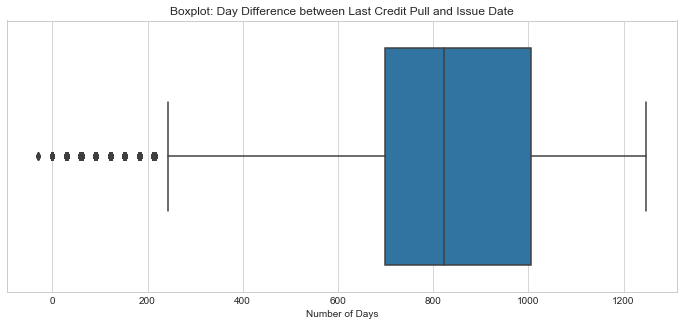

In [59]:
plt.figure(figsize=(12,5))

sns.boxplot(date_diff)

plt.title('Boxplot: Day Difference between Last Credit Pull and Issue Date')
plt.xlabel('Number of Days')

plt.show()

With a median difference of 800 days, it is evident that we are encountering the anticipated time sensitivity issue with dates: older loans on file are still updated with more recent credit pull dates and consequently don't accurately reflect the situation at the time the loan instantiated. Consequently it would be best to discard this column for analysis.

In [60]:
data.drop('last_credit_pull_d', axis=1, inplace=True)

The two remaining dates, 'earliest_cr_line' and 'issue_d' should be absolute, i.e. they never get updated during the course of the loan and consequently can still act as a valid snapshot of conditions at the time the loan was instantiated.

##### Text Data

In [61]:
data[text_cols].isnull().sum()

url               0
emp_title     47105
desc         737067
title           138
dtype: int64

The text data identified, such as the description of their employment, loan purpose, etc. is going to be limited since these fields were all entered by the applicants without any strict categories or tags. For example, taking a look at the 'title' of loans:

In [62]:
data['title'].value_counts()

Debt consolidation                       412037
Credit card refinancing                  163951
Home improvement                          39861
Other                                     31550
Major purchase                            11966
Debt Consolidation                        11179
Medical expenses                           6627
Business                                   6526
Car financing                              5530
Consolidation                              4292
Moving and relocation                      3903
Vacation                                   3688
debt consolidation                         3656
Home buying                                2347
consolidation                              1714
Credit Card Consolidation                  1691
Debt Consolidation Loan                    1334
Consolidation Loan                         1309
Home Improvement                           1125
Personal Loan                              1118
Credit Card Refinance                   

This information is captured much more concisely in the 'purpose' column:

In [63]:
data['purpose'].value_counts()

debt_consolidation    489015
credit_card           195486
home_improvement       46896
other                  36660
major_purchase         14126
medical                 7445
small_business          7445
car                     6661
moving                  4547
vacation                4131
house                   3000
wedding                  875
renewable_energy         432
educational                1
Name: purpose, dtype: int64

The same issue can be seen for 'emp_title':

In [64]:
data['emp_title'].value_counts()

Teacher                                  13460
Manager                                  11235
Registered Nurse                          5523
Owner                                     5373
RN                                        5351
Supervisor                                4982
Sales                                     4209
Project Manager                           3986
Driver                                    3566
Office Manager                            3509
General Manager                           3177
Director                                  3155
manager                                   3138
teacher                                   2922
owner                                     2849
Engineer                                  2670
President                                 2596
driver                                    2429
Vice President                            2348
Attorney                                  2133
Operations Manager                        2071
Accountant   

The variation / inconsistency in data is obviously even worse for description, and so for the sake of simplicity and the effort it would take to identify and split these text values into appropriate categories, we will simply remove these columns from the data:

In [65]:
text_cols

['url', 'emp_title', 'desc', 'title']

In [66]:
data.drop(text_cols, axis=1, inplace=True)

Whilst it is a shame to lose all information regarding the employment title, one would hope that at least the annual income & employment length provides enough information.

##### Final Review of Null Data

In [67]:
data.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

No null values remain!

### ID Columns

We have not addressed the ID columns yet. For the purpose of actually modelling itself these are obviously useless, but it may be worth preserving at least the loan ID for consistency in potential joins between different encodings tables.

In [68]:
# Check if all records have a unique ID
data['id'].duplicated().sum()

0

In [69]:
# Set id column as the new index
data.set_index('id', drop=True, inplace=True)

In [70]:
# Drop member_id column
data.drop('member_id', axis=1, inplace=True)

In [71]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged,verification_status_merged
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10149342,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,10+ years,OWN,55000.0,Verified,2013-12-01,Current,n,debt_consolidation,481xx,MI,22.87,0.0,1986-10-01,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,0,0,0,55000.0,22.87,Verified
10159584,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,1 year,RENT,26000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,927xx,CA,25.12,0.0,2007-01-01,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,0,0,0,26000.0,25.12,Not Verified
10159498,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,060xx,CT,14.05,0.0,1994-03-01,1.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,1,0,0,105000.0,14.05,Not Verified
10139658,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,871xx,NM,16.94,0.0,1998-10-01,0.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1,1,1,40000.0,16.94,Source Verified
10159548,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,334xx,FL,16.51,0.0,1998-03-01,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,1,1,0,63000.0,16.51,Not Verified


### Removing Current Loans

Current loans should be discarded from anaylsis since for the purposes of our classification problem there is no way of categorizing them as defaulted or fully paid. Additionally, for the purposes of regression they will be misleading since many current loans will appear to be at a loss even if they are on track to being fully paid.

In [72]:
# Retain copy of current loan data

mask_current_loans = data['loan_status'].isin(['Current', 'Issued', 'In Grace Period'])

data_current = data[mask_current_loans].copy()

f = 'loan_current.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'wb') as file:
    pickle.dump(data_current, file)

In [73]:
data = data[~mask_current_loans].copy()

In [74]:
data['loan_status'].value_counts()

Fully Paid            153937
Charged Off            35206
Late (31-120 days)     11462
Late (16-30 days)       2328
Default                 1200
Name: loan_status, dtype: int64

Note that the two 'Late' statuses have been kept. This is to allow for flexibility in how harshly a default is categorized. During analysis it will have to be decided if keeping these values benefits both the classification and regression models.

### Removing Outliers

During EDA there were a few columns identified which had concerning outliers.

In [75]:
data.describe(percentiles=[0.01, .05, .25, 0.5, .75, .95, 0.99])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged
count,204133.000000,204133.000000,204133.000000,204133.000000,204133.000000,2.041330e+05,204133.000000,204133.000000,204133.000000,204133.000000,204133.000000,2.041330e+05,204133.000000,204133.000000,204133.000000,204133.000000,204133.000000,204133.000000,204133.000000,204133.000000,204133.000000,204133.000000,204133.000000,204133.00000,204133.000000,204133.0,204133.000000,2.041330e+05,2.041330e+05,2.041330e+05,204133.000000,204133.000000,204133.000000,2.041330e+05,204133.000000
mean,14288.963445,14288.908334,14281.979507,14.376996,441.038412,7.365542e+04,17.491359,0.293059,0.854884,11.387639,0.179648,1.567764e+04,55.348672,25.885927,860.306605,859.993953,13415.794223,13409.009426,11348.430884,1906.121094,0.784087,160.458165,17.069458,7079.36923,0.009724,1.0,0.004482,2.050362e+02,1.370138e+05,2.952769e+04,0.480647,0.254285,0.150461,7.365605e+04,17.491049
std,8242.081627,8242.000030,8238.484826,4.449671,247.334114,5.865028e+04,7.953443,0.818538,1.075584,4.991593,0.491576,1.993141e+04,23.786682,11.811001,3705.280951,3703.922188,9575.069461,9570.467942,8611.452853,1992.498900,5.792670,734.595558,104.453035,7634.75829,0.107196,0.0,0.072700,2.032446e+04,1.513713e+05,2.951326e+04,0.499627,0.435460,0.357523,5.865023e+04,7.952914
min,1000.000000,1000.000000,950.000000,5.320000,27.850000,3.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,0.000000,0.000000,0.000000,3.000000e+03,0.000000
1%,1800.000000,1800.000000,1800.000000,6.030000,62.330000,2.000000e+04,1.930000,0.000000,0.000000,3.000000,0.000000,3.670000e+02,2.300000,6.000000,0.000000,0.000000,595.726400,595.121600,237.764800,25.203200,0.000000,0.000000,0.000000,17.22000,0.000000,1.0,0.000000,0.000000e+00,3.306000e+03,3.000000e+03,0.000000,0.000000,0.000000,2.000000e+04,1.930000
5%,3600.000000,3600.000000,3600.000000,7.620000,121.910000,2.900000e+04,5.010000,0.000000,0.000000,5.000000,0.000000,2.058000e+03,14.000000,10.000000,0.000000,0.000000,1830.498000,1829.830000,913.440000,136.810000,0.000000,0.000000,0.000000,159.40000,0.000000,1.0,0.000000,0.000000e+00,8.658600e+03,5.900000e+03,0.000000,0.000000,0.000000,2.900000e+04,5.010000
25%,8000.000000,8000.000000,8000.000000,11.140000,264.270000,4.500000e+04,11.520000,0.000000,0.000000,8.000000,0.000000,6.231000e+03,38.100000,17.000000,0.000000,0.000000,6076.660000,6074.850000,4500.000000,615.970000,0.000000,0.000000,0.000000,570.84000,0.000000,1.0,0.000000,0.000000e+00,2.831100e+04,1.320000e+04,0.000000,0.000000,0.000000,4.500000e+04,11.520000
50%,12000.000000,12000.000000,12000.000000,14.090000,386.740000,6.400000e+04,17.080000,0.000000,1.000000,11.000000,0.000000,1.127900e+04,56.500000,24.000000,0.000000,0.000000,11260.401922,11252.900000,10000.000000,1302.280000,0.000000,0.000000,0.000000,4775.51000,0.000000,1.0,0.000000,0.000000e+00,7.897500e+04,2.210000e+04,0.000000,0.000000,0.000000,6.400000e+04,17.080000
75%,20000.000000,20000.000000,19925.000000,17.270000,575.500000,8.900000e+04,23.170000,0.000000,1.000000,14.000000,0.000000,1.953700e+04,73.900000,33.000000,0.000000,0.000000,18590.280745,18581.980000,16000.000000,2453.770000,0.000000,0.000000,0.000000,11027.51000,0.000000,1.0,0.000000,0.000000e+00,2.062290e+05,3.660000e+04,1.000000,1.000000,0.000000,8.900000e+04,23.170000
95%,30750.000000,30750.000000,30750.000000,22.470000,929.870000,1.500000e+05,31.260000,2.000000,3.000000,21.000000,

As seen in the list above, the following features should be looked into further:

- annual_inc (and annual_inc_merged)
- revol_bal
- revol_util
- tot_coll_amt
- tot_cur_bal
- total_rev_hi_lim

##### Annual Income

In [76]:
col = 'annual_inc_merged'

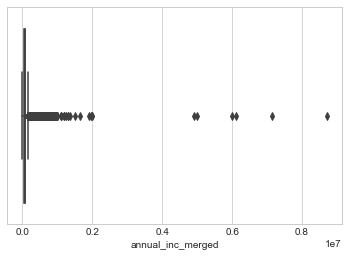

In [77]:
sns.boxplot(data[col])
plt.show()

In [78]:
p=0.999

q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {:.1f} percentile = {}'.format(col, p*100,q))
print('# records above {:.1f} percentile = {})'.format(p*100,n))

annual_inc_merged 99.9 percentile = 500000.0
# records above 99.9 percentile = 184)


In [79]:
p = 0.9999
q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {} percentile = {}'.format(col, p*100,q))
print('# records above {} percentile = {})'.format(p*100,n))

annual_inc_merged 99.99 percentile = 1100000.0
# records above 99.99 percentile = 19)


Based off the results above, we should probably at least discard data above the 1 mil. income mark.

In [80]:
income_outliers = data['annual_inc_merged'] > 1000000

##### Revolving Balance

In [81]:
col = 'revol_bal'

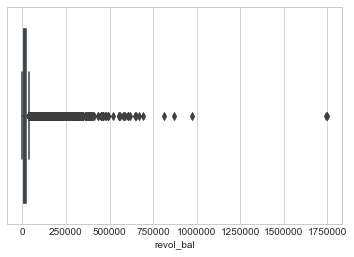

In [82]:
sns.boxplot(data[col])
plt.show()

In [83]:
p=0.99

q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {:.1f} percentile = {}'.format(col, p*100,q))
print('# records above {:.1f} percentile = {})'.format(p*100,n))

revol_bal 99.0 percentile = 79707.47999999992
# records above 99.0 percentile = 2042)


In [84]:
p = 0.999
q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {} percentile = {}'.format(col, p*100,q))
print('# records above {} percentile = {})'.format(p*100,n))

revol_bal 99.9 percentile = 242812.568000013
# records above 99.9 percentile = 205)


In [85]:
p = 0.9999
q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {} percentile = {}'.format(col, p*100,q))
print('# records above {} percentile = {})'.format(p*100,n))

revol_bal 99.99 percentile = 508336.185599735
# records above 99.99 percentile = 21)


In [86]:
data[q_mask]['loan_status'].value_counts()

Fully Paid            17
Late (31-120 days)     3
Charged Off            1
Name: loan_status, dtype: int64

Although there a fair number of outliers, the distribution of data does appear to be distributed consistently until the approx. 500,000 mark. Considering the various quantiles explored above, a cutoff of \$500,000 appears to be a decent comprimise between retaining data and eliminating extreme values

In [87]:
revol_bal_outliers = data['revol_bal'] > 500000

##### Revolving Utiliziation

In [88]:
col = 'revol_util'

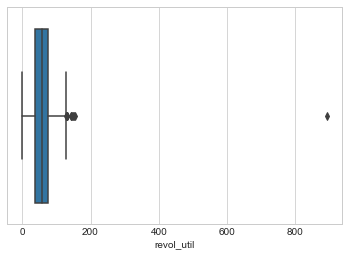

In [89]:
sns.boxplot(data[col])
plt.show()

In [90]:
p=0.99

q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {:.1f} percentile = {}'.format(col, p*100,q))
print('# records above {:.1f} percentile = {})'.format(p*100,n))

revol_util 99.0 percentile = 97.9
# records above 99.0 percentile = 1960)


In [91]:
p = 0.9999
q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {} percentile = {}'.format(col, p*100,q))
print('# records above {} percentile = {})'.format(p*100,n))

revol_util 99.99 percentile = 119.66283999998706
# records above 99.99 percentile = 21)


In [92]:
data[q_mask]['loan_status'].value_counts()

Fully Paid            7
Late (31-120 days)    6
Charged Off           6
Late (16-30 days)     2
Name: loan_status, dtype: int64

Looking at the boxplot, there is only one real outlier of concern. A cap of 200 should be a sufficient cutoff to take care of this outlier.

In [93]:
revol_util_outliers = data['revol_util'] > 200

##### Total Collected Amount

In [94]:
col = 'tot_coll_amt'

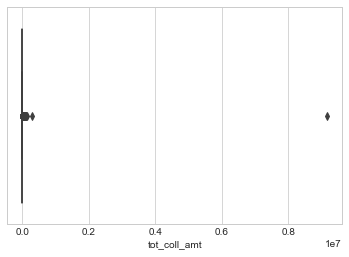

In [95]:
sns.boxplot(data[col])
plt.show()

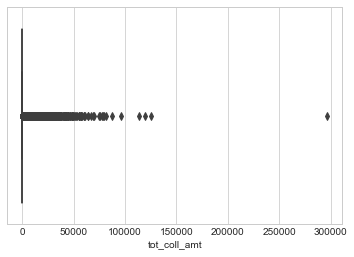

In [96]:
# View without max value
sns.boxplot(data.drop((np.argmax(data['tot_coll_amt'] == data['tot_coll_amt'].max())))[col])
plt.show()

In [97]:
p=0.999

q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {:.1f} percentile = {}'.format(col, p*100,q))
print('# records above {:.1f} percentile = {})'.format(p*100,n))

tot_coll_amt 99.9 percentile = 21178.016000003554
# records above 99.9 percentile = 205)


In [98]:
p = 0.9999
q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {} percentile = {}'.format(col, p*100,q))
print('# records above {} percentile = {})'.format(p*100,n))

tot_coll_amt 99.99 percentile = 59162.885599981644
# records above 99.99 percentile = 21)


Given the relatively continuous distribution data up to 100,000, we will set that as the cutoff and simply eliminate the few select extreme values.

In [99]:
tot_coll_outliers = data['tot_coll_amt'] > 100000

##### Total Rev Lim

In [100]:
col = 'total_rev_hi_lim'

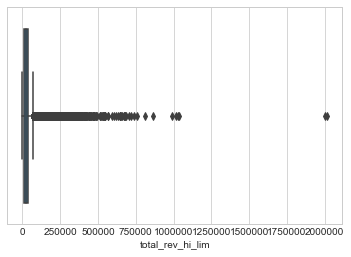

In [101]:
sns.boxplot(data[col])
plt.show()

In [102]:
p=0.999

q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {:.1f} percentile = {}'.format(col, p*100,q))
print('# records above {:.1f} percentile = {})'.format(p*100,n))

total_rev_hi_lim 99.9 percentile = 304173.60000000335
# records above 99.9 percentile = 205)


In [103]:
p = 0.9999
q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {} percentile = {}'.format(col, p*100,q))
print('# records above {} percentile = {})'.format(p*100,n))

total_rev_hi_lim 99.99 percentile = 645800.0
# records above 99.99 percentile = 20)


500,000 should be a comprimise between the two thresholds shown above.

In [104]:
rev_lim_outliers = data['total_rev_hi_lim'] > 500000

##### Total Current Balance

In [105]:
col = 'tot_cur_bal'

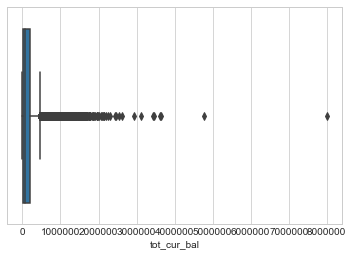

In [106]:
sns.boxplot(data[col])
plt.show()

In [107]:
p=0.999

q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {:.1f} percentile = {}'.format(col, p*100,q))
print('# records above {:.1f} percentile = {})'.format(p*100,n))

tot_cur_bal 99.9 percentile = 1162599.6720000152
# records above 99.9 percentile = 205)


In [108]:
p = 0.9999
q = data[col].quantile(p)
q_mask = data[col] > q
n = q_mask.sum()

print('{} {} percentile = {}'.format(col, p*100,q))
print('# records above {} percentile = {})'.format(p*100,n))

tot_cur_bal 99.99 percentile = 1996338.1659997185
# records above 99.99 percentile = 21)


Setting a threshold for 2 mil. should at least remove our most extreme outliers.

In [109]:
tot_bal_outliers = data['tot_cur_bal'] > 2000000

##### Drop Outlier Records

In [110]:
outliers = income_outliers | revol_bal_outliers | revol_util_outliers | rev_lim_outliers | tot_coll_outliers | tot_bal_outliers

In [111]:
outliers.sum()

77

In [112]:
data = data[~outliers].copy()

### Saving Cleaned Dataframe

In [113]:
data_clean = data

In [114]:
data_clean.shape[0]

204056

In [115]:
# Create pickle file for cleaned data

f = 'loan_clean.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'wb') as file:
    pickle.dump(data_clean, file)

In [2]:
# Open pickle file with cleaned data

f = 'loan_clean.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'rb') as file:
    data_clean = pickle.load(file)

In [5]:
data_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged,verification_status_merged
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10139658,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,871xx,NM,16.94,0.0,1998-10-01,0.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1,1,1,40000.0,16.94,Source Verified
10179520,3000.0,3000.0,3000.0,36 months,12.85,100.87,B,B4,10+ years,RENT,25000.0,Verified,2013-12-01,Fully Paid,n,debt_consolidation,322xx,FL,24.68,0.0,1991-05-01,0.0,5.0,2.0,2875.0,54.2,26.0,f,0.00,0.00,3181.532981,3181.53,3000.00,181.53,0.0,0.0,0.0,2677.23,0.0,1.0,INDIVIDUAL,0.0,154.0,19530.0,5300.0,1,1,1,25000.0,24.68,Verified
10149577,28000.0,28000.0,28000.0,36 months,7.62,872.52,A,A3,5 years,MORTGAGE,325000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,945xx,CA,18.55,0.0,1994-11-01,1.0,15.0,0.0,29581.0,54.6,31.0,w,0.00,0.00,29150.980000,29150.98,28000.00,1150.98,0.0,0.0,0.0,23915.86,0.0,1.0,INDIVIDUAL,0.0,0.0,799592.0,54200.0,0,0,0,325000.0,18.55,Source Verified
10127816,24000.0,24000.0,24000.0,36 months,13.53,814.80,B,B5,10+ years,MORTGAGE,100000.0,Verified,2013-12-01,Fully Paid,n,credit_card,493xx,MI,22.18,0.0,1989-01-01,0.0,14.0,0.0,21617.0,76.7,39.0,w,0.00,0.00,28652.210000,28652.21,24000.00,4652.21,0.0,0.0,0.0,10726.61,0.0,1.0,INDIVIDUAL,0.0,539.0,199834.0,28200.0,0,0,0,100000.0,22.18,Verified
10149566,8000.0,8000.0,8000.0,36 months,10.99,261.88,B,B2,2 years,MORTGAGE,33000.0,Not Verified,2013-12-01,Late (31-120 days),n,debt_consolidation,800xx,CO,15.75,0.0,1991-07-01,1.0,9.0,1.0,7203.0,34.6,16.0,f,4145.19,4145.19,4990.030000,4990.03,3854.81,1120.22,15.0,0.0,0.0,276.88,0.0,1.0,INDIVIDUAL,0.0,0.0,15949.0,20800.0,0,0,1,33000.0,15.75,Not Verified


### Key Take-Aways:

##### Dropped Columns:

- ['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']: Only had data for December 2015</b>: 
- ['last_credit_pull_d']: date value is not static from the point of loan issuing, and consequently cannot be used for analysis.
- ['url', 'emp_title', 'desc', 'title']: Text columns with inconsistent values. Cannot be utilized without extensive text analysis beyond the scope of this project.
- ['member_id']: ID column; no use.

##### Dropped Rows:

- ANY null values: ['delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'open_acc', 'total_acc', 'acc_now_delinq'] (29 records)
- ANY null values: 'annual_inc' (4 records)
- ANY null values: ['dti', 'dti_joint', dti_merged'] (2 records)
- ANY null values: ['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal'] (70,276 records; data prior to approx. mid 2012)
- ['loan_status'] == 'Current', 'Issued', 'In Grace Period'. Active loans cannot be used for analysis, since their ultimate default status and total return are unknown.

##### Modified/Replaced Columns:

- ['dti_joint']: replaced by 'dti_merged'
- ['annual_inc_joint']: replaced by 'annual_inc_merged'
- ['mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last\_record']: replaced by respective 'had\_...' binary column.
- ['verification_status_joint']: replaced by 'verification_status_merged'.
- ['id']: set as index.

##### New Columns:

- ['dti_merged']: combined 'dti' and 'dti_joint'. If value for joint exists, it takes priority over regular value.
- ['annual_inc_merged']: combined 'annual_inc' and 'annual_inc_joint'. If value for joint exists, it takes priority over regular value.
- ['had_delinq', 'had_major_derog', 'had_record']: binary columns indicating if borrower had record of delinquency etc. in the past. Replaced 'months since...' equivalent columns.
- ['verification_status_merged']: combined 'verification_status' and 'verification_status_joint'. If value for joint exists, it takes priority over regular value.

##### Removed Outliers:

- annual_inc_merged > 1,000,000
- revol_bal > 500,000
- revol_util > 200
- tot_coll_amt > 100,000
- tot_cur_bal
- total_rev_hi_lim > 500,000

##### Other Notes:

- ['last_pymnt_d', 'next_pymnt_d']: This time sensitive data cannot be utilized as a means of comparison between loans since older loans will obviously have older dates. These columns were kept as a reference only, and should not be used in modelling.
- ['loan_status']: Records with values of 'Late...' have been kept for the time being, although they are technically current loans. Further analysis needed to determine if using these records in modelling is beneficial.

### Next Steps:

Data Preparation / Feature Engineering:
- Create target variable for default loan classification
- Create target variable for loan return regression
- Investigate benefits of including/excluding late loan data
- Add new features
- Create train & test datasets